In [25]:
#the goal of this project is to statistically justify the overall amount of playing time Alex Caruso got during the 
#2019-20 nba regualar season and playoffs
#all statistics and metrics used to evaluate alex caruso will be from the 2019-20 regular season and playoffs
#statistics are extracted from https://www.basketball-reference.com/players/c/carusal01.html#all_advanced



In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [27]:
#read in dataframes 
#df_playoffs is Alex Caruso's playoffs stats 2019-2020 season
#df_playoffs_advanced is Alex Caruso's advanced stats from the 2019-2020 season
#df_regseason is Alex Caruso's stats from the 2019-2020 regular season

df_playoffs = pd.read_csv('Caruso2019_playoffs.csv')
df_playoffs_advanced = pd.read_csv('Caruso_playoffs_advanced.csv')
df_regseason = pd.read_csv('caruso_201920_reg.csv')


In [28]:
#We need to do some typecasting because our minutes played column is not in a calculable form
#the minutes played is in a float type with ':' as a seperator of minutes and seconds
#I typecasted the minutes played column of all necessary columns used in ML models and calculations
#The minutes played column will display in the minutes and after the decimal will be the seconds divided by 60
import math 

def typecaster(val):
    #testing to see if our calculation is correct
    print('input:',str(val))
    i = val
    #checking to see if there is a null value
    if (type(i) == float) and (math.isnan(i) == True): 
        r = 0
    #checking to see if the value is empty 
    elif len(str(i)) == 0: 
        r = 0
    else:     
        i = str(i)
        #getting rid of excess information 
        if len(i)>5:
            r = i[:-3]
        elif i == 'nan': 
            r = 0
        #we will split the value and convert it into decimal form
        new = i.split(':')
        if len(new) > 1:
            #we calculate the number of minutes in decimal form by taking the first element
            #and adding to the second element divided by 60
            r = int(new[0]) + int(new[1])/60
        else: 
            #if he played less than 1 minute we divide the result by 60
            r = float(new[0]) / 60
    print('output:', r)        
    return r

#apply our function to the column(use.map because it applies to the entire column rather than apply which applies to an entire row)
df_regseason['MP'] = df_regseason['MP'].map(typecaster)


input: nan
output: 0
input: 20:27
output: 20.45
input: 13:16
output: 13.266666666666667
input: 12:45
output: 12.75
input: 15:41
output: 15.683333333333334
input: 20:02
output: 20.033333333333335
input: 23:32
output: 23.533333333333335
input: 18:41
output: 18.683333333333334
input: 17:22
output: 17.366666666666667
input: 24:47:00
output: 24.783333333333335
input: 27:05:00
output: 27.083333333333332
input: 28:33:00
output: 28.55
input: 21:06
output: 21.1
input: 19:51
output: 19.85
input: 17:16
output: 17.266666666666666
input: nan
output: 0
input: 13:07
output: 13.116666666666667
input: 25:03:00
output: 25.05
input: 19:17
output: 19.283333333333335
input: 25:01:00
output: 25.016666666666666
input: 15:50
output: 15.833333333333334
input: 21:04
output: 21.066666666666666
input: 23:46
output: 23.766666666666666
input: 30:20:00
output: 30.333333333333332
input: 28:14:00
output: 28.233333333333334
input: 10:38
output: 10.633333333333333
input: 15:10
output: 15.166666666666666
input: 25:07:00


In [29]:
#Applying our function to the df_playoffs column 
df_playoffs['MP'] = df_playoffs['MP'].map(typecaster)


input: 29:03:00
output: 29.05
input: 17:10
output: 17.166666666666668
input: 26:46:00
output: 26.766666666666666
input: 20:52
output: 20.866666666666667
input: 25:20:00
output: 25.333333333333332
input: 16:12
output: 16.2
input: 25:33:00
output: 25.55
input: 24:48:00
output: 24.8
input: 29:43:00
output: 29.716666666666665
input: 23:37
output: 23.616666666666667
input: 22:19
output: 22.316666666666666
input: 28:50:00
output: 28.833333333333332
input: 24:41:00
output: 24.683333333333334
input: 20:08
output: 20.133333333333333
input: 25:39:00
output: 25.65
input: 21:58
output: 21.966666666666665
input: 23:14
output: 23.233333333333334
input: 26:05:00
output: 26.083333333333332
input: 22:19
output: 22.316666666666666
input: 22:47
output: 22.783333333333335
input: 32:42:00
output: 32.7


The average number of minutes that Alex Caruso played during the regular season is 16.55234741784037


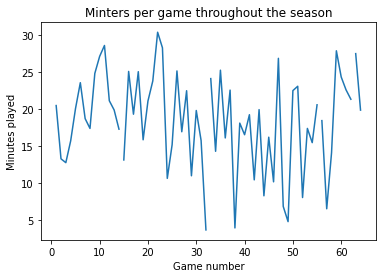

In [30]:
#here is a quick graph that shows the amount of minutes he played throughout each game in the regular season
x = df_regseason['G']
y = df_regseason['MP']

#Here is his average number of minutes played during the regular season
print('The average number of minutes that Alex Caruso played during the regular season is', df_regseason['MP'].mean())
plt.plot(x,y)
plt.xlabel('Game number')
plt.ylabel('Minutes played')
plt.title('Minters per game throughout the season')
plt.show()

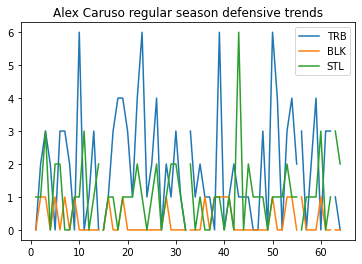

In [31]:
#regular season defensive trends
x = df_regseason[['G']]
y = df_regseason[['TRB', 'BLK', 'STL']]
leg_labels = ['TRB', 'BLK', 'STL']
plt.plot(x,y)
plt.title('Alex Caruso regular season defensive trends')
plt.legend(leg_labels)
plt.show()

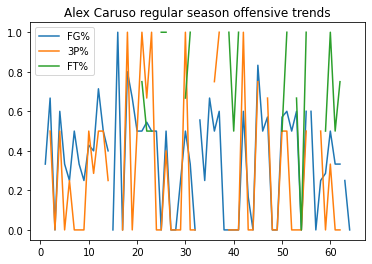

In [32]:
#regular season offensive trends
x = df_regseason[['G']]
y = df_regseason[['FG%','3P%', 'FT%']]
plt.plot(x,y)
plt.title('Alex Caruso regular season offensive trends')
legend_labels = ['FG%', '3P%', 'FT%']
plt.legend(legend_labels)
plt.show()

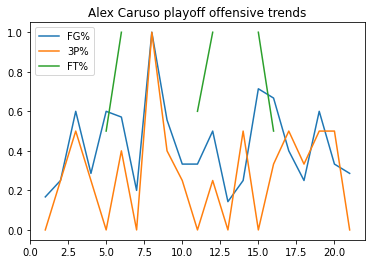

In [33]:
#playoffs offensive trends
x = df_playoffs[['G']]
y = df_playoffs[['FG%','3P%', 'FT%']]
plt.plot(x,y)
plt.title('Alex Caruso playoff offensive trends')
legend_labels = ['FG%', '3P%', 'FT%']
plt.legend(legend_labels)
plt.show()

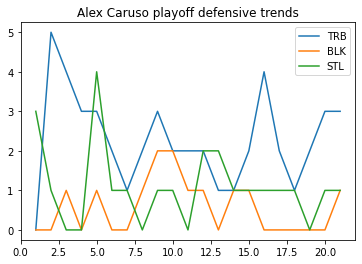

In [34]:
#playoffs defensive trends
x = df_playoffs[['G']]
y = df_playoffs[['TRB', 'BLK', 'STL']]
leg_labels = ['TRB', 'BLK', 'STL']
plt.plot(x,y)
plt.title('Alex Caruso playoff defensive trends')
plt.legend(leg_labels)
plt.show()

In [35]:
print('Alex Carusos average Game Score during the 2019-2020 regular season was' ,df_regseason['GmSc'].mean())
#What is considered an "average" game score is 10 in the nba
print('Alex Carusos average number of minutes played during the 2019-2020 regular season was', df_regseason['MP'].mean())

Alex Carusos average Game Score during the 2019-2020 regular season was 4.753125
Alex Carusos average number of minutes played during the 2019-2020 regular season was 16.55234741784037


In [36]:
print('Alex Carusos average Game Score during the 2019-2020 playoffs was' ,df_playoffs_advanced['GmSc'].mean())
#What is considered an "average" game score is 10 in the nba and this is an improvement 
#from his performance during the regular season although he played more minutes
print('Alex Carusos average number of minutes played during the 2019-2020 playoffs was' ,df_playoffs['MP'].mean())

Alex Carusos average Game Score during the 2019-2020 playoffs was 5.466666666666667
Alex Carusos average number of minutes played during the 2019-2020 playoffs was 24.274603174603175


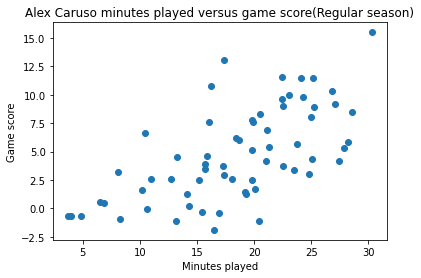

In [37]:
#scatter plot between game score and minutes played 
from sklearn.linear_model import LinearRegression

x = df_regseason['MP']
y = df_regseason['GmSc']
plt.scatter(x,y)
plt.title('Alex Caruso minutes played versus game score(Regular season)')
plt.xlabel('Minutes played')
plt.ylabel('Game score')
plt.show()
#from this graph we can see that there seems to be some positive linear correlation between his minutes played and his game score
#game score is a metric that takes into account many offensive and defensive statistics 
#an explaination of the game score metric can be found using this link: 
#https://www.nba.com/resources/static/team/v2/thunder/statlab-gamescore-191201.pdf

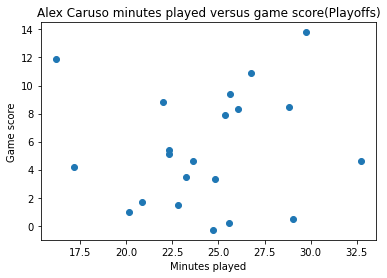

In [38]:
#minutes played versus game score in the playoffs
x = df_playoffs['MP']
y = df_playoffs['GmSc']
plt.scatter(x,y)
plt.title('Alex Caruso minutes played versus game score(Playoffs)')
plt.xlabel('Minutes played')
plt.ylabel('Game score')
plt.show()
#this scatter plot shows less of a positive linear correlation between game score and minutes played but it is a 
#much smaller data sample(playoffs)

In [39]:
df_regseason['GmSc'] = df_regseason['GmSc'].fillna(value = 0)
#there are a few null values where alex caruso did not play so we will fill those null values with a 0 


In [40]:
#splitting train and test data and building the linear regression model 
from sklearn.model_selection import train_test_split
#we will try to linearly predict Alex Caruso's game score based on the amount of minutes he played
x = df_regseason['MP']
y = df_regseason['GmSc']
#our training set will be 80% of the data
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state = 1)

lr = LinearRegression()

#remember to put .values before reshape
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values
lr.fit(x_train, y_train)
pred = lr.predict(x_test.values.reshape(-1,1))
y_pred = lr.predict(y_test.values.reshape(-1,1))

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('The mean absolute error of our linear regression model is',mae, '(Game Score units)')

The mean absolute error of our linear regression model is 4.6876110625941925 (Game Score units)


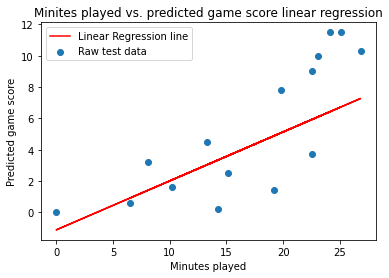

Our models score on a scale from 0.0 to 1.0 is 0.525804457164583


In [41]:
## Here I plot the graph of the predicted values versus the test data along with the regression line shown below
#our model received about a 0.5258 on a 0.0-1.0 scale
#note that this model is using Caruso's data from the regular season since it is a larger sample size
plt.plot(x_test, pred, label = 'Linear Regression line', color = 'r')
plt.scatter(x_test, y_test, label = 'Raw test data')
plt.legend()
plt.title('Minites played vs. predicted game score linear regression')
plt.xlabel('Minutes played')
plt.ylabel('Predicted game score')
plt.show()

score = lr.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))
print('Our models score on a scale from 0.0 to 1.0 is', score)

In [42]:
# here is a sample prediction from the model that will predict Caruso's game score when he plays 20 minutes
sample_prediction = lr.predict(np.array([[20]]))[0]
print('Our model predicts that in a game where Alex Caruso played 20 minutes he earned a game score of ',round(sample_prediction,2))

Our model predicts that in a game where Alex Caruso played 20 minutes he earned a game score of  5.13


In [43]:
from sklearn.linear_model import Lasso

#here I try a lasso regression model to see if it is more accurate than the linear regression
lasso_regressor = Lasso()
lasso_regressor.fit(x_train,y_train)
lasso_score = lasso_regressor.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))
print(lasso_score)


0.5124741602762913


In [44]:
from sklearn.ensemble import RandomForestRegressor
#here I try a random forest regression and it is far less accurate than the linear regression model

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_score = rf.score(x_test.values.reshape(-1,1), y_test.values.reshape(-1,1))
print(rf_score)

0.3771816890606625


In [45]:
df_playoffs_ws = pd.read_csv('2019-20playoffsadvanced.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df_playoffs_ws.head())
#here I printed a short table that shows advanced statistics such as win shares(offensive and defensive), PER, and rebound percentages
#The only statistic that stands out to me is his steal percentage and difference between TOV% and USG rate

   Rk                    Player  Age   G   MP   PER    TS%   3PAr    FTr  \
0   1             Anthony Davis   26  21  769  29.6  0.665  0.167  0.499   
1   2              LeBron James   35  21  762  30.2  0.647  0.312  0.393   
2   3  Kentavious Caldwell-Pope   26  21  608  10.5  0.560  0.630  0.143   
3   4               Danny Green   32  21  525   9.6  0.473  0.676  0.088   
4   5               Alex Caruso   25  21  510   9.9  0.543  0.540  0.265   

   ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  Unnamed: 17  OWS  DWS   WS  \
0   8.5  22.7  15.6  16.1   1.7   3.8  10.8  27.8          NaN  3.3  1.2  4.5   
1   4.4  30.5  17.5  42.0   1.7   2.3  15.8  30.4          NaN  3.0  1.2  4.3   
2   1.6   6.9   4.3   6.4   1.7   0.6   6.9  15.5          NaN  0.5  0.6  1.1   
3   5.7   9.2   7.4   6.7   1.9   3.0   6.4  15.6          NaN  0.1  0.7  0.8   
4   3.5   7.6   5.6  15.2   2.2   2.3  19.7  13.4          NaN  0.2  0.6  0.8   

   WS/48  Unnamed: 22  OBPM  DBPM   BPM  VORP  
0  0.284

In [46]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df_playoffs_ws.head(5))

#from this table we can see that Alex Caruso ranks 5th in defensive win shares and 4th in offensive win shares when comapred to his teamates
#it should also be taken into account that his turnover percentage is significantly higher than his usage rate which would show a offensive weakness/inefficiency
#His PER is below the league average of 15(his playoff PER was 9.9 and regular season was 10.8)
#here are alex caruso's hustle stats: https://go.nba.com/i91v
#During the playoffs alex caruso averaged 2.3 deflections per game!!!(click on the link above to see this table I was not able to extract the data)



   Rk                    Player  Age   G   MP   PER    TS%   3PAr    FTr  \
0   1             Anthony Davis   26  21  769  29.6  0.665  0.167  0.499   
1   2              LeBron James   35  21  762  30.2  0.647  0.312  0.393   
2   3  Kentavious Caldwell-Pope   26  21  608  10.5  0.560  0.630  0.143   
3   4               Danny Green   32  21  525   9.6  0.473  0.676  0.088   
4   5               Alex Caruso   25  21  510   9.9  0.543  0.540  0.265   

   ORB%  DRB%  TRB%  AST%  STL%  BLK%  TOV%  USG%  Unnamed: 17  OWS  DWS   WS  \
0   8.5  22.7  15.6  16.1   1.7   3.8  10.8  27.8          NaN  3.3  1.2  4.5   
1   4.4  30.5  17.5  42.0   1.7   2.3  15.8  30.4          NaN  3.0  1.2  4.3   
2   1.6   6.9   4.3   6.4   1.7   0.6   6.9  15.5          NaN  0.5  0.6  1.1   
3   5.7   9.2   7.4   6.7   1.9   3.0   6.4  15.6          NaN  0.1  0.7  0.8   
4   3.5   7.6   5.6  15.2   2.2   2.3  19.7  13.4          NaN  0.2  0.6  0.8   

   WS/48  Unnamed: 22  OBPM  DBPM   BPM  VORP  
0  0.284